# Clustering Interpretation with Decision Trees

In [23]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [24]:
path="/Users/kellyliu/Documents/GitHub/Customer-Personality-Analysis-2.0/Data/Clustered Data/Clustered_Test_Data.csv"
df = pd.read_csv(path)

In [21]:
df.shape

(2231, 49)

In [15]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Clusters,PercentWebpurchases
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,66.666667
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,33.333333
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,44.444444
3,6182.0,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,33.333333
4,5324.0,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,45.454545


In [25]:
# Separate features and target variable
X = df.drop(['ID', 'Clusters'], axis=1)  # drop the ID and Clusters column
y = df['Clusters']

# Split the data into training and testing sets for validation purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       114
           1       0.88      0.96      0.92       137
           2       0.96      0.93      0.94       110
           3       0.96      0.85      0.90        86

    accuracy                           0.94       447
   macro avg       0.94      0.93      0.94       447
weighted avg       0.94      0.94      0.94       447



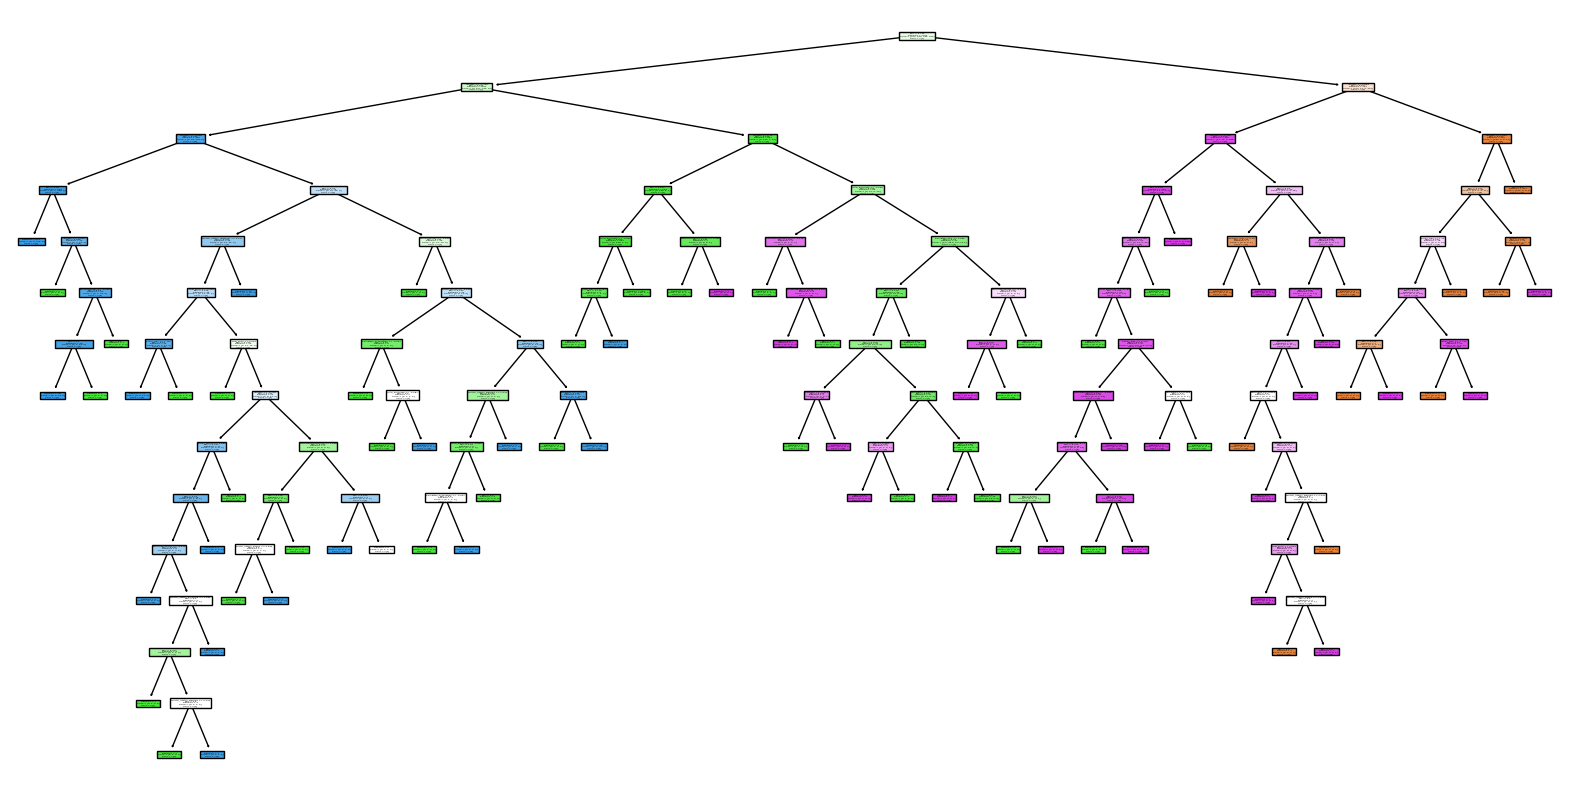

In [26]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred = clf.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True)
plt.show()

Cross-validation scores: [0.93736018 0.93721973 0.93049327 0.93721973 0.90807175]
Mean cross-validation score: 0.93007293265517


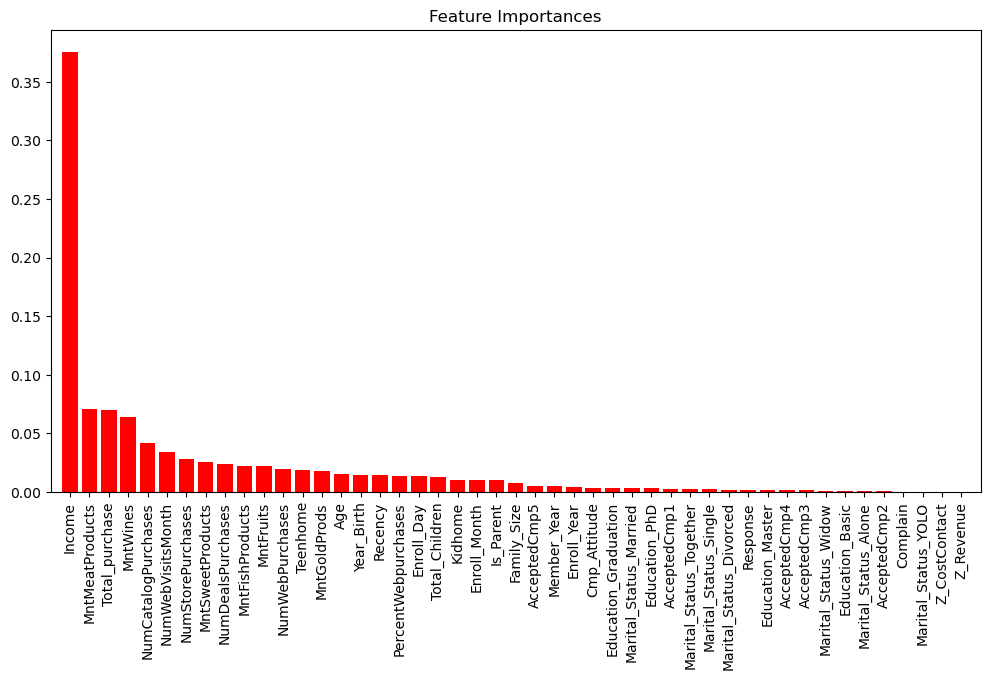

In [27]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation to assess model reliability
cv_scores = cross_val_score(rf, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the Random Forest Classifier
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()